In [3]:
!pip install WordCloud

     |████████████████████████████████| 163kB 2.0MB/s eta 0:00:01


In [4]:
import os
import glob
import pandas as pd
import zipfile
from zipfile import ZipFile
import requests
import urllib.request
import time
import pickle
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Download All Zip Files

In [5]:
# Bring in the url to check its response

url = 'https://webrobots.io/kickstarter-datasets/'
response = requests.get(url)
response

<Response [200]>

In [6]:
# Soup html parse

soup = BeautifulSoup(response.text, 'html.parser')

In [8]:
# Loop through and download the links, pause to not spam the site
# ONLY NEEDED ONCE TO GRAB ZIP FILES, DO NOT RE-RUN

# for i in range(46):
#     one_a_tag = soup.findAll('a', string='CSV')[i] # Select all download links with CSV only
#     link = one_a_tag['href']
#     download_url = link
#     urllib.request.urlretrieve(download_url, './'+link[link.find('/Kickstarter_')+1:]) 
#     time.sleep(1) #pause the code for a sec

## Unzip All Zip Files

In [61]:
# Loop through and unzip files 
# ONLY NEEDED ONCE TO UNZIP FILES, DO NOT RE-RUN

# data_paths = glob.glob("./data/*.zip") # path to data

# counter = 1
# for item in data_paths:
#     zipfile.ZipFile(item).extractall()
#     for filename in os.listdir("."):
#         if filename.endswith(".csv"):
#             # rename and move each file into /csv_data
#             os.rename(filename, ("./csv_data/" + filename[:-4] + str(counter) + '.csv'))
#         counter += 1

In [1]:
# zip file number
zip_paths = glob.glob("./data/*.zip")
list1 = set(zip_paths)
print('zip:', len(list1))

# raw data files number
csv_paths = glob.glob("./csv_data/*.csv")
list1 = set(csv_paths)
print('csv:', len(list1))

# clean data files number
clean_csv_paths = glob.glob("./clean_csv_data/*.csv")
list1 = set(clean_csv_paths)
print('clean csv:', len(list1))

zip: 46
csv: 2059
clean csv: 2045


## Look at Raw Data

In [2]:
import pandas as pd
import json

path = './csv_data/Kickstarter037173.csv'
df = pd.read_csv(path)

# set options
pd.options.display.max_columns = 500

print(df.shape)
df.head(5)

(4165, 35)


,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,currency_symbol,currency_trailing_code,deadline,state_changed_at,created_at,launched_at,staff_pick,backers_count,static_usd_rate,usd_pledged,creator,location,category,profile,spotlight,urls,source_url,friends,is_starred,is_backing,permissions,unread_messages_count,unseen_activity_count,last_update_published_at
0,699366486,"{""small"":""https://ksr-ugc.imgix.net/assets/013...",The Artist as Professional,Pre-purchase my works so I can afford to make ...,200.0,600.0,successful,the-artist-as-professional,False,AU,AUD,$,True,1475894531,1475894531,1474945873,1475289731,False,13,0.769527,461.716044,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""AU"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,269187739,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Cafe to Cafe Exhibit~New Fiber Art Works by Pa...,"I'm having surgury soon, & will have 6 weeks r...",300.0,420.0,successful,cafe-to-cafe-exhibit-new-fiber-art-works-by-paula,False,US,USD,$,True,1436983260,1436983261,1434386831,1434561010,False,10,1.000000,420.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,983217279,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Original drawings on italian silk scarves,'Sleeping Dogs' or 'Koi' art featured on silk ...,6000.0,6689.0,successful,art-prints-on-italian-silk-scarves,False,GB,GBP,£,False,1437643994,1437643997,1434895954,1435051994,False,45,1.588734,10627.041525,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2138528459,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","""When You Seek Me, You Will Find Me"" Tote Bags",Hi everyone! I've designed these awesome tote ...,315.0,480.0,successful,when-you-seek-me-you-will-find-me-tote-bags,False,US,USD,$,True,1455576176,1455576176,1454703232,1454712176,False,24,1.000000,480.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,825456617,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Detroit Minds Think Alike,"I hand-paint embroidered DETROIT knit caps. I,...",500.0,800.0,successful,detroit-minds-think-alike,False,US,USD,$,True,1426271564,1426271565,1420687301,1423683164,False,24,1.000000,800.000000,"{""urls"":{""web"":{""user"":""https://www.kickstarte...","{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...","{""background_image_opacity"":0.8,""should_show_f...",True,"{""web"":{""project"":""https://www.kickstarter.com...",https://www.kickstarter.com/discover/categorie...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.copy()
# Generate text for wordcloud
text = " ".join(review for review in df.blurb)

stopwords = set(STOPWORDS)
stopwords.update(["the", "off", "of"])

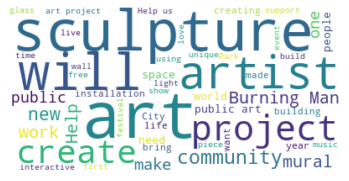

In [6]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=50).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Function to Clean DataFrame

In [7]:
def clean_df(csv_path):
    """ 
    This is a function to clean data.
        
    Input // file path
        
    Return // a dataframe
    
    """
    df = pd.read_csv(csv_path)
    
    # Pick useful features
    features = ['id', 'blurb', 'goal', 'slug', 'country', 'deadline', 'state_changed_at',
            'created_at', 'launched_at', 'category', 'pledged', 'backers_count',
            'static_usd_rate', 'usd_pledged', 'location', 'urls', 'state']
    
    # Only perform function on dataframes that have all features
    if set(features).issubset(df.columns.tolist()):
    
        df = df[features]

        # rename columns
        df = df.rename(columns={'slug':'name', 'state':'target'})

        # only keep failed and successful targets
        targets = ['failed', 'successful']
        df = df[df['target'].isin(targets)]

        # drop nans
        df.dropna(inplace=True)

        # Changing dates from epoch to year-month-day
        df['date_created'] = pd.to_datetime(df['created_at'], unit='s').dt.date
        df['deadline_date'] = pd.to_datetime(df['deadline'], unit='s').dt.date
        df['launched_date'] = pd.to_datetime(df['launched_at'], unit='s').dt.date
        df['state_changed_at'] = pd.to_datetime(df['state_changed_at'], unit='s').dt.date

        # Convert goal to usd currency
        df['goal_usd'] = df['goal'] * df['static_usd_rate']
        df['goal_usd'] = [int(i) for i in df['goal_usd']]

        # change usd pledged to int
        df['usd_pledged'] = [int(i) for i in df['usd_pledged']]

        # Create campaign duration
        df['campaign_duration_days'] = df['deadline_date'] - df['launched_date']
        df['campaign_duration_days'] = [str(i).split()[0] for i in df['campaign_duration_days']]

        # Turn columns into json object
        df['category'] = df['category'].apply(json.loads)
        df['urls'] = df['urls'].apply(json.loads)
        df['location'] = df['location'].apply(json.loads)

        # pull values from json objects
        df['city'] = [i['name'] for i in df['location']]
        df['state'] = [i['state'] for i in df['location']]
        df['category'] = [i['name'] for i in df['category']]
        df['url'] = [i['web']['project'] for i in df['urls']]

        # Drop all unused columns and null values
        drop_columns = ['created_at', 'deadline', 'launched_at', 'urls', 'pledged'
                        , 'goal', 'static_usd_rate', 'deadline', 'location']
        df.drop(columns=drop_columns, inplace=True)
        df.dropna(inplace=True)

        # reorder columns
        column_order = ['id','name', 'blurb', 'category', 'campaign_duration_days', 'goal_usd', 'country'
                      , 'city', 'state', 'date_created', 'deadline_date', 'launched_date'
                      , 'state_changed_at', 'backers_count', 'usd_pledged', 'url','target']
        df = df.reindex(columns=column_order)
        
        df = df.drop_duplicates()
    
        return df
    else:
        return 1


In [8]:
# test clean_df function
new_df = clean_df(path)

# compare shapes
print(new_df.shape, 'old df:', df.shape)

new_df.head(5)

(3968, 17) old df: (4165, 35)


,id,name,blurb,category,campaign_duration_days,goal_usd,country,city,state,date_created,deadline_date,launched_date,state_changed_at,backers_count,usd_pledged,url,target
0,699366486,the-artist-as-professional,Pre-purchase my works so I can afford to make ...,Textiles,7,153,AU,Melbourne,VIC,2016-09-27,2016-10-08,2016-10-01,2016-10-08,13,461,https://www.kickstarter.com/projects/503441754...,successful
1,269187739,cafe-to-cafe-exhibit-new-fiber-art-works-by-paula,"I'm having surgury soon, & will have 6 weeks r...",Textiles,28,300,US,Eugene,OR,2015-06-15,2015-07-15,2015-06-17,2015-07-15,10,420,https://www.kickstarter.com/projects/613591326...,successful
2,983217279,art-prints-on-italian-silk-scarves,'Sleeping Dogs' or 'Koi' art featured on silk ...,Textiles,30,9532,GB,London,England,2015-06-21,2015-07-23,2015-06-23,2015-07-23,45,10627,https://www.kickstarter.com/projects/170664798...,successful
3,2138528459,when-you-seek-me-you-will-find-me-tote-bags,Hi everyone! I've designed these awesome tote ...,Textiles,10,315,US,Las Vegas,NV,2016-02-05,2016-02-15,2016-02-05,2016-02-15,24,480,https://www.kickstarter.com/projects/387208630...,successful
4,825456617,detroit-minds-think-alike,"I hand-paint embroidered DETROIT knit caps. I,...",Textiles,30,500,US,Detroit,MI,2015-01-08,2015-03-13,2015-02-11,2015-03-13,24,800,https://www.kickstarter.com/projects/341316192...,successful


In [9]:
# look at target distribution
new_df.drop_duplicates().groupby('target').count()

,id,name,blurb,category,campaign_duration_days,goal_usd,country,city,state,date_created,deadline_date,launched_date,state_changed_at,backers_count,usd_pledged,url
target,,,,,,,,,,,,,,,,
failed,1964,1964,1964,1964,1964,1964,1964,1964,1964,1964,1964,1964,1964,1964,1964,1964
successful,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004,2004


## Function to clean all dataframes and create new csv

In [12]:
# Get data file names
path = r'./csv_data'
filenames = glob.glob(path + "/*.csv")

def clean_csv(filename_list):
    path = './clean_csv_data/' # this path is the new folder to store csvs
    for file in filename_list:
        df = clean_df(file)
        if type(df) is pd.DataFrame:
            df.to_csv(path + file.split('/')[2], index=False)
        else:
            continue

In [13]:
# # clean data in all csv files
# # only need to run once
# clean_csv(filenames)

## Function to merge all CSV

In [14]:
# Get data file names
path = r'./clean_csv_data'
filenames = glob.glob(path + "/*.csv")

def merge_csv(filename_list):
    
    # create and concatenate dataframes
    df = pd.concat([pd.read_csv(file) for file in filename_list])
    
    return df

In [15]:
%%time
# # only need to run once

# big_df = merge_csv(filenames)

CPU times: user 1min 9s, sys: 9.3 s, total: 1min 18s
Wall time: 1min 21s


In [383]:
# big_df.to_csv('clean_data.csv', index=False)

In [16]:
len(big_df)

7433051

In [17]:
print(big_df.shape)
big_df.head()

(7433051, 17)


,id,name,blurb,category,campaign_duration_days,goal_usd,country,city,state,date_created,deadline_date,launched_date,state_changed_at,backers_count,usd_pledged,url,target
0,1123889576,mars-on-earth-an-art-residency,Help a fine art photographer continue her proj...,Space Exploration,27,1000,US,Boston,MA,2015-06-24,2015-10-23,2015-09-26,2015-10-23,53,1884,https://www.kickstarter.com/projects/cassandra...,successful
1,1724173143,vulcan-i-rocket-powered-by-3d-printed-engine,Team of undergraduates racing to be the first ...,Space Exploration,30,15000,US,San Diego,CA,2014-05-06,2015-05-21,2015-04-21,2015-05-21,465,21882,https://www.kickstarter.com/projects/105499101...,successful
2,707260502,starscraper-the-next-generation-of-suborbital-...,What if we built a rocket that is better than ...,Space Exploration,31,10000,US,Boston,MA,2014-11-29,2015-01-09,2014-12-09,2015-01-09,294,17176,https://www.kickstarter.com/projects/burpg/sta...,successful
3,497637964,students-building-a-near-space-balloon-with-li...,A group of high school students are building a...,Space Exploration,30,150,US,Mountain View,CA,2014-11-19,2015-11-26,2015-10-27,2015-11-26,45,970,https://www.kickstarter.com/projects/136362214...,successful
4,1546008758,earth-360,Re-inventing the way we look at our planet by ...,Space Exploration,30,7500,US,Fairfield,CT,2012-04-11,2012-09-21,2012-08-22,2012-09-21,28,7576,https://www.kickstarter.com/projects/211370922...,successful
